In [2]:
import os
import yaml

import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
import tensorflow as tf

from model.VGG19 import VGG19
from preprocess.preprocess import load_data

# Config

In [3]:
with open('config/config.yml', 'r') as stream:
    config = yaml.safe_load(stream)

ROOT_DIRECTORY = os.path.dirname(os.path.abspath('__file__'))

# Initialize the model

In [4]:
input_shape = (config["img_height"], config["img_width"], 3)
model = VGG19(input_shape = input_shape, num_classes = config["num_classes"])

# Load data

In [5]:
path_to_set = os.path.join(ROOT_DIRECTORY, config["path_to_data"])
path_to_train_csv = os.path.join(ROOT_DIRECTORY, config["path_to_train_csv"])
path_to_test_csv = os.path.join(ROOT_DIRECTORY, config["path_to_test_csv"])
(X_train, y_train) = load_data(path_to_train_csv, path_to_set, config["img_width"], config["img_height"])
(X_test, y_test) = load_data(path_to_test_csv, path_to_set, config["img_width"], config["img_height"])

loaded: 0
loaded: 500
loaded: 1000
loaded: 1500
loaded: 2000
loaded: 2500
loaded: 3000
loaded: 3500
loaded: 4000
loaded: 4500
loaded: 5000
loaded: 5500
loaded: 6000
loaded: 6500
loaded: 7000
loaded: 7500
loaded: 8000
loaded: 8500
loaded: 9000
loaded: 9500
loaded: 10000
loaded: 10500
loaded: 11000
loaded: 11500
loaded: 12000
loaded: 12500
loaded: 13000
loaded: 13500
loaded: 14000
loaded: 14500
loaded: 15000
loaded: 15500
loaded: 16000
loaded: 16500
loaded: 17000
loaded: 17500
loaded: 18000
loaded: 18500
loaded: 19000
loaded: 19500
loaded: 20000
loaded: 20500
loaded: 21000
loaded: 21500
loaded: 22000
loaded: 22500
loaded: 23000
loaded: 23500
loaded: 24000
loaded: 24500
loaded: 25000
loaded: 25500
loaded: 26000
loaded: 26500
loaded: 27000
loaded: 27500
loaded: 28000
loaded: 28500
loaded: 29000
loaded: 29500
loaded: 30000
loaded: 30500
loaded: 31000
loaded: 31500
loaded: 32000
loaded: 32500
loaded: 33000
loaded: 33500
loaded: 34000
loaded: 34500
loaded: 35000
loaded: 35500
loaded: 36000
lo

# Split test data 50% - 50% for adversarial training

In [6]:
X_test, _, y_test, _ = train_test_split(X_test, y_test, test_size = 0.5, random_state = 0)

# Normalize the data

In [7]:
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# One-Hot Encode Target value

In [8]:
y_train = tf.keras.utils.to_categorical(y_train, config["num_classes"])
y_test = tf.keras.utils.to_categorical(y_test, config["num_classes"])

# Shuffle train data before splitting

In [9]:
X_train, y_train = sklearn.utils.shuffle(X_train, y_train, random_state = 0)

# Create Callback for Early Stopping

In [10]:
callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 3)

# Training

In [11]:
optimizer = tf.keras.optimizers.Adam(lr = config["learning_rate"], decay = config["learning_rate"] / (config["epochs"]))
loss = config["loss_function"]
metrics = config["metrics"]
model.compile(optimizer = optimizer, loss = loss, metrics = [metrics])
fit = model.fit(
  x = X_train,
  y = y_train,
  validation_split = 0.1,
  batch_size = config["batch_size"],
  callbacks = [callback],
  verbose = 1,
  epochs = config["epochs"])

C:\Users\auste\anaconda3\envs\urop\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/20
552/552 [==============================] - 1411s 3s/step - loss: 2.5035 - accuracy: 0.2438 - val_loss: 3.3056 - val_accuracy: 0.3198
Epoch 2/20
552/552 [==============================] - 1390s 3s/step - loss: 0.9746 - accuracy: 0.6457 - val_loss: 1.1960 - val_accuracy: 0.6641
Epoch 3/20
552/552 [==============================] - 1367s 2s/step - loss: 0.3685 - accuracy: 0.8802 - val_loss: 1.1229 - val_accuracy: 0.7552
Epoch 4/20
552/552 [==============================] - 1387s 3s/step - loss: 0.1836 - accuracy: 0.9494 - val_loss: 0.3796 - val_accuracy: 0.9064
Epoch 5/20
552/552 [==============================] - 1269s 2s/step - loss: 0.1079 - accuracy: 0.9731 - val_loss: 0.0562 - val_accuracy: 0.9883
Epoch 6/20
552/552 [==============================] - 1159s 2s/step - loss: 0.0747 - accuracy: 0.9826 - val_loss: 0.1514 - val_accuracy: 0.9612
Epoch 7/20
552/552 [==============================] - 1196s 2s/step - loss: 0.0697 - accuracy: 0.9837 - val_loss: 0.3483 - val_accuracy:

# Plot loss in each epoch

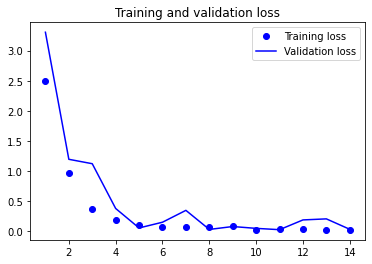

In [12]:
loss = fit.history['loss']
val_loss = fit.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Evaluate on test set

In [13]:
model.evaluate(X_test, y_test, batch_size = config["batch_size"])

99/99 [==============================] - 29s 293ms/step - loss: 0.2334 - accuracy: 0.9601


[0.23339103162288666, 0.9600949883460999]

# Save model

In [14]:
model.save_weights(os.path.join(ROOT_DIRECTORY, config["path_to_weights"]))